In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

#Music processing with Librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = './Data' 
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
y, sr = librosa.load(f'{general_path}/genres_original/pop/pop.00012.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

audio_length = len(y) / sr
print(f'Audio Length (seconds): {audio_length}')

y: [ 0.16629028  0.19113159  0.19692993 ... -0.2711792  -0.40167236
 -0.372406  ] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Audio Length (seconds): 30.00018140589569


In [4]:
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.16629028  0.19113159  0.19692993 ... -0.2711792  -0.40167236
 -0.372406  ] 

Audio File shape: (661504,)


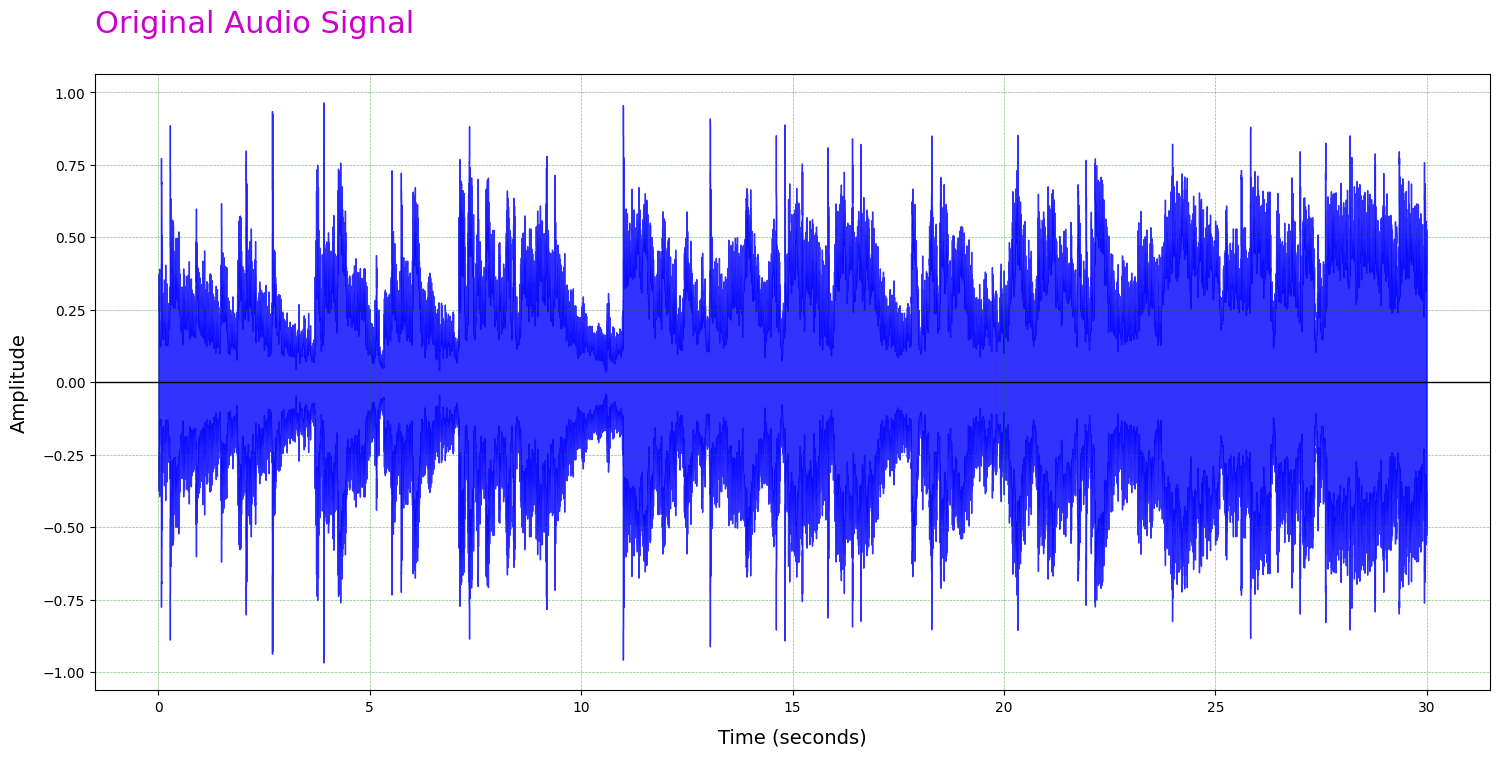

In [6]:
plt.figure(figsize=(18, 8))

librosa.display.waveshow(y=audio_file, sr=sr, color="blue", alpha=0.8)

plt.title("Original Audio Signal\n", fontsize=22, color="#cc00cc", loc="left")
plt.xlabel("Time (seconds)", fontsize=14, labelpad=10)
plt.ylabel("Amplitude", fontsize=14, labelpad=10)
plt.grid(color="green", linestyle="--", linewidth=0.5, alpha=0.5)
plt.axhline(0, color="black", linewidth=1)

plt.show()

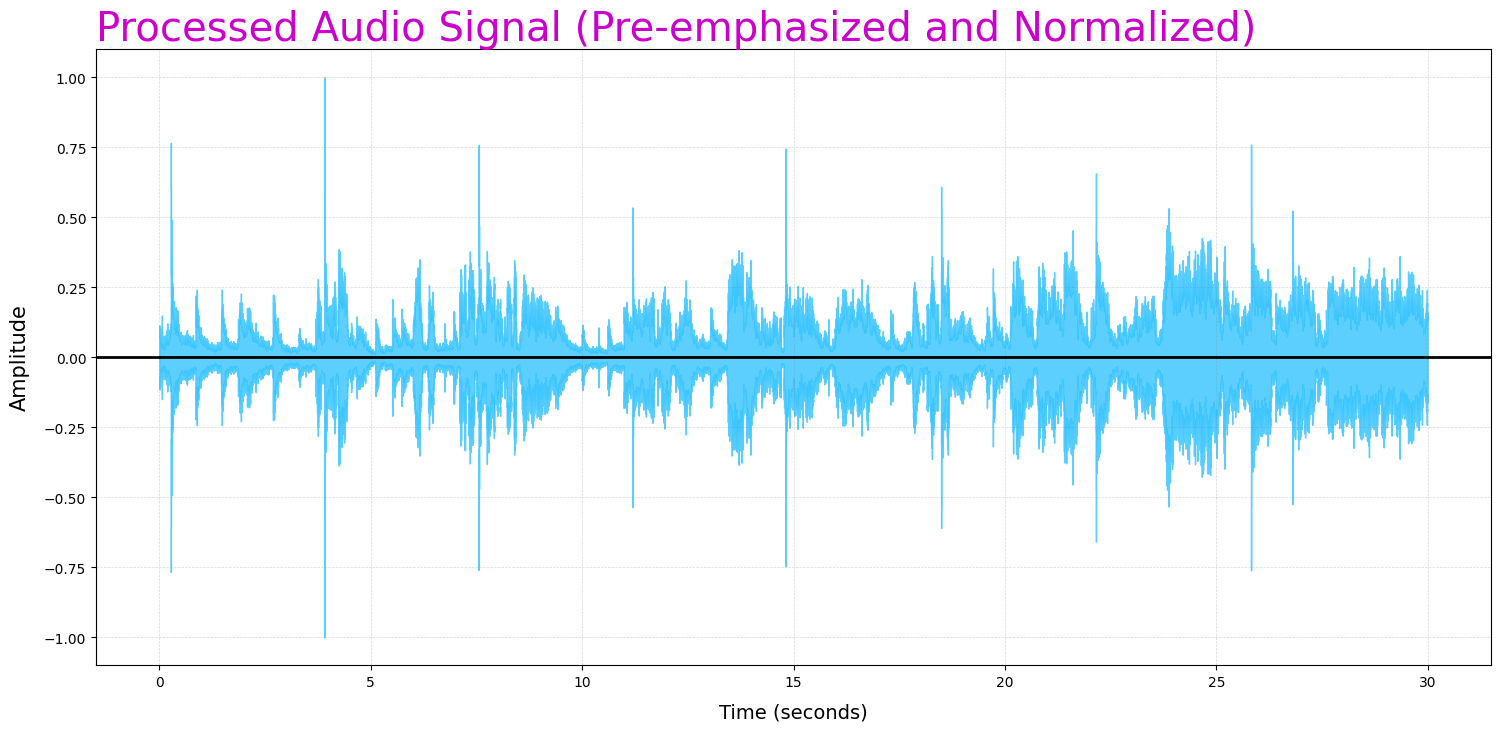

In [7]:
plt.figure(figsize=(18, 8))
def pre_emphasis(y, coeff=0.97):
    return np.append(y[0], y[1:] - coeff * y[:-1])

y_pre = pre_emphasis(audio_file)

y_norm = librosa.util.normalize(y_pre)
librosa.display.waveshow(y=y_norm, sr=sr, color="#33C3FF", alpha=0.8)
plt.title("Processed Audio Signal (Pre-emphasized and Normalized)", fontsize=29, color="#cc00cc", loc="left")
plt.xlabel("Time (seconds)", fontsize=14, labelpad=10)
plt.ylabel("Amplitude", fontsize=15, labelpad=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.3)
plt.axhline(0, color="black", linewidth=2)
plt.show()

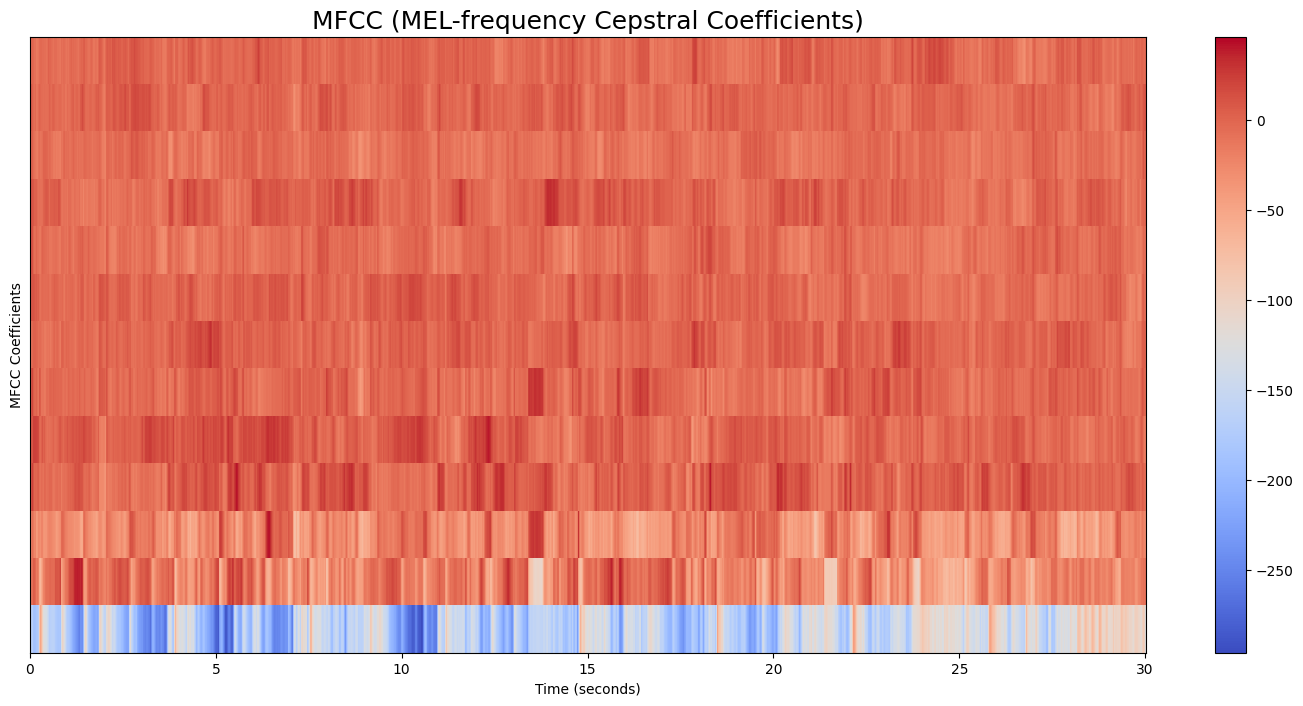

In [8]:
mfcc = librosa.feature.mfcc(y=y_norm, sr=sr, n_mfcc=13)

plt.figure(figsize=(18, 8))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC (MEL-frequency Cepstral Coefficients)', fontsize=18)
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.show()

In [7]:
fft_size  = 2048 
step_size = 512 

#Short-time Fourier transform(STFT)
D = np.abs(librosa.stft(audio_file, n_fft=fft_size, hop_length=step_size))
print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


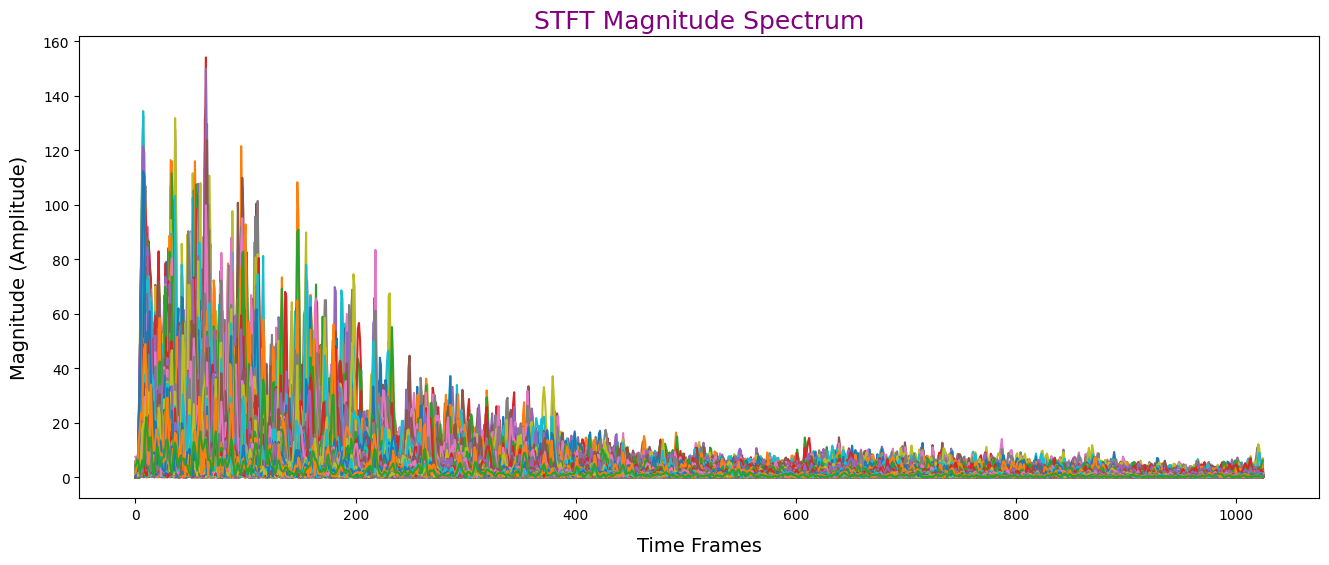

In [8]:
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.title("STFT Magnitude Spectrum", fontsize=18, color="purple", loc="center")
plt.xlabel("Time Frames", fontsize=14, labelpad=10)
plt.ylabel("Magnitude (Amplitude)", fontsize=14, labelpad=10);

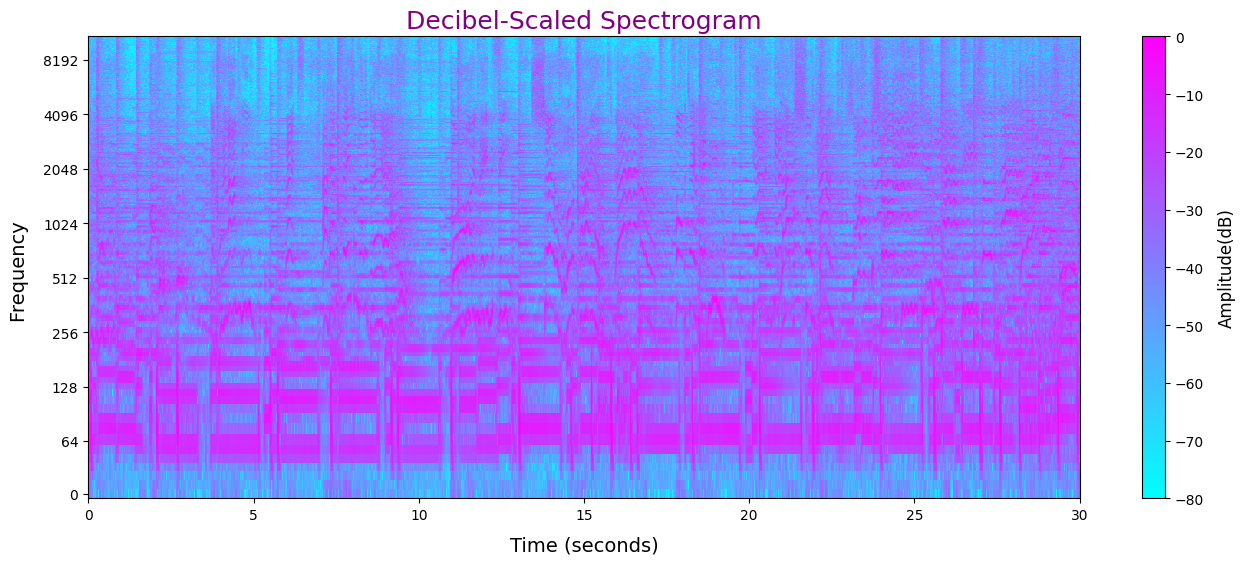

In [11]:
spectrogram_db = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(16, 6))

librosa.display.specshow(spectrogram_db, sr=sr, hop_length=step_size, x_axis='time', y_axis='log', cmap='cool')

plt.title("Decibel-Scaled Spectrogram", fontsize=18, color="purple", loc="center")

plt.xlabel("Time (seconds)", fontsize=14, labelpad=10)
plt.ylabel("Frequency ", fontsize=14, labelpad=10)

cbar = plt.colorbar()
cbar.set_label("Amplitude(dB)", fontsize=12, labelpad=10)

plt.show()

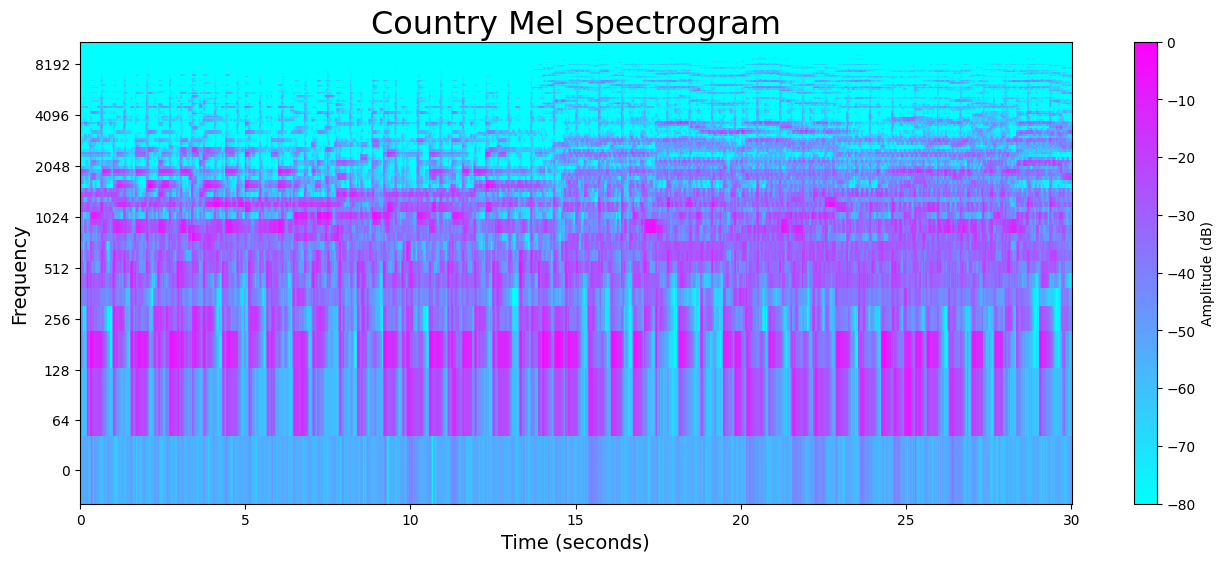

In [15]:
audio_data, sample_rate = librosa.load(f'{general_path}/genres_original/country/country.00017.wav')
audio_data, _ = librosa.effects.trim(audio_data)
mel_spectrogram = librosa.feature.melspectrogram(audio_data, sr=sample_rate)
mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, hop_length=step_size,x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(label='Amplitude (dB)')
plt.title("Country Mel Spectrogram", fontsize=23)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

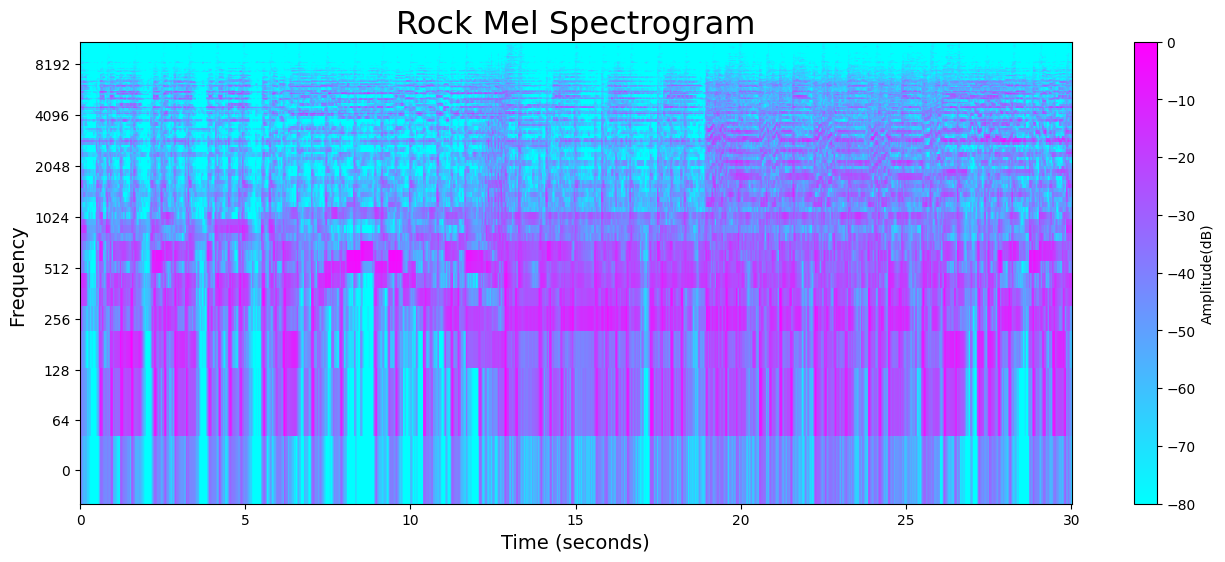

In [17]:
audio_signal, sample_rate = librosa.load(f'{general_path}/genres_original/rock/rock.00039.wav')
audio_signal, _ = librosa.effects.trim(audio_signal)
mel_spectrogram = librosa.feature.melspectrogram(audio_signal, sr=sample_rate)

mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, hop_length=step_size, x_axis='time', y_axis='log', cmap='cool')

plt.colorbar(label='Amplitude(dB)')
plt.title("Rock Mel Spectrogram", fontsize=23)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Frequency ", fontsize=14)

plt.show()

In [2]:
data = pd.read_csv('features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


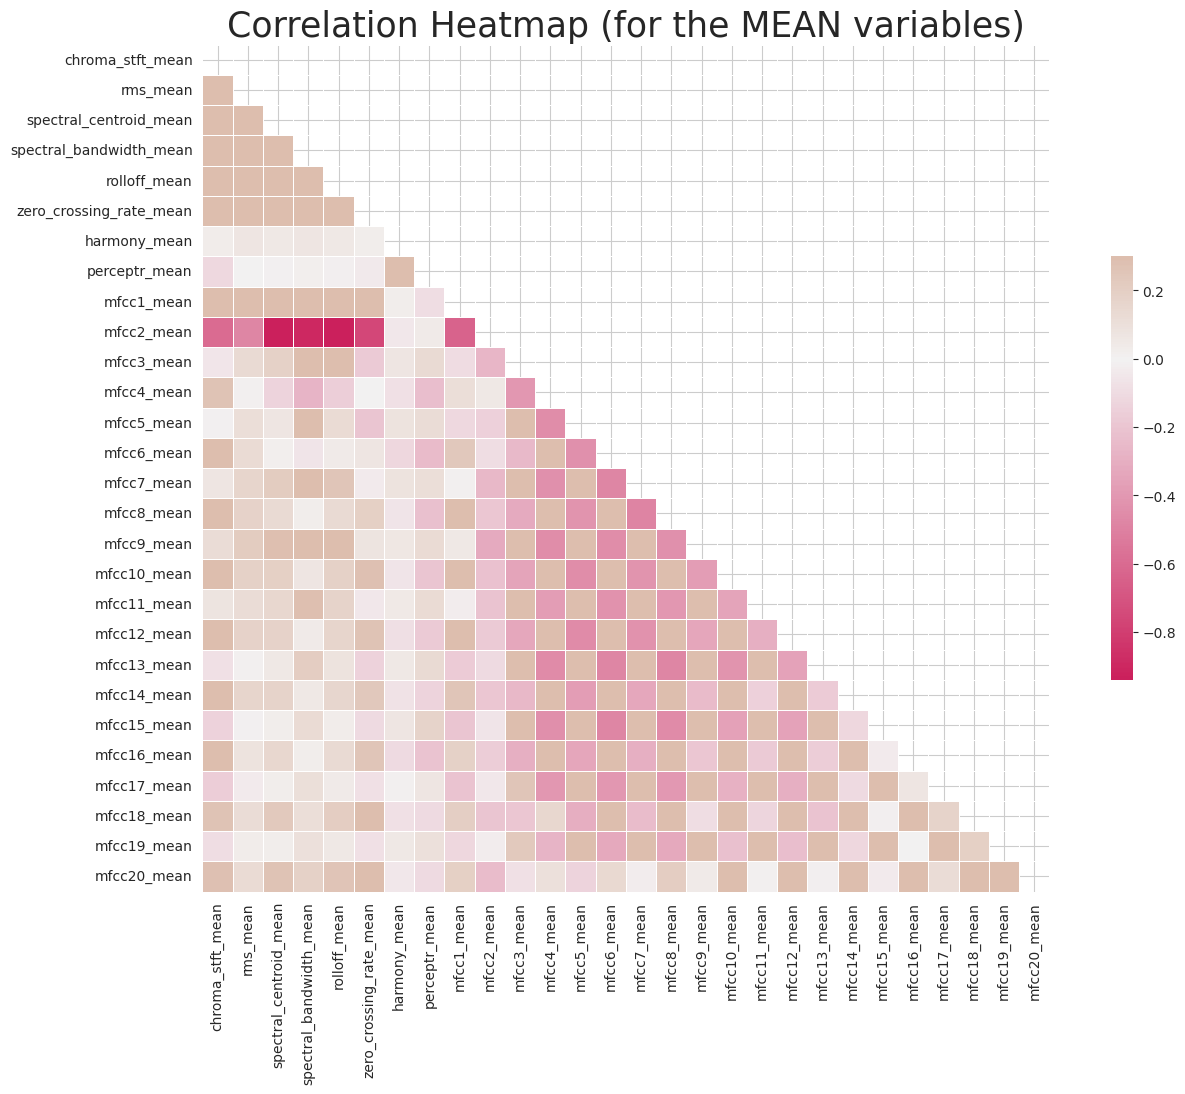

In [7]:
#Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);



Text(0, 0.5, 'Beats per Minute')

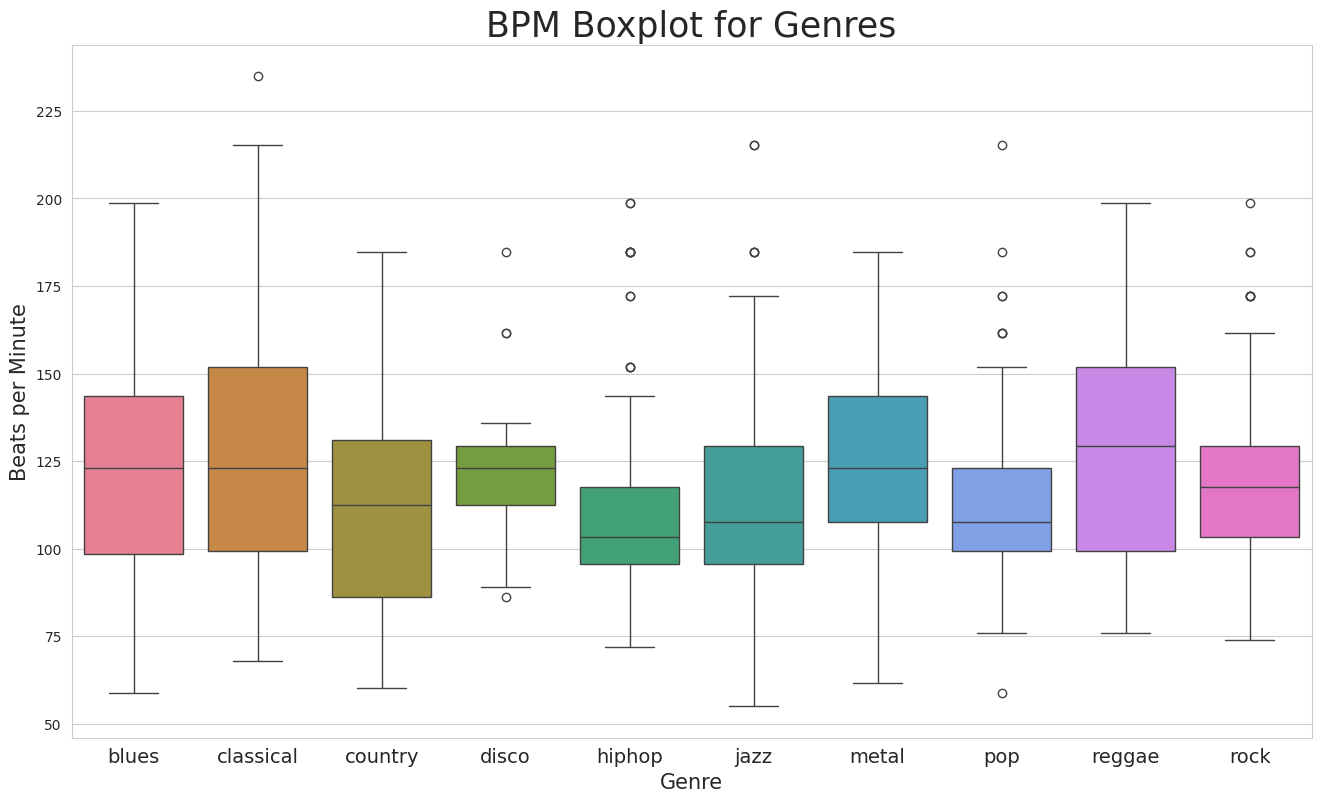

In [10]:
#Box plot for Genres Distribution
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Beats per Minute", fontsize = 15)

In [11]:
#Principle component analysis to visualize groups of genres
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#Normalization X
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [12]:
#Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
finalDf = pd.concat([principalDf, y], axis = 1)
pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

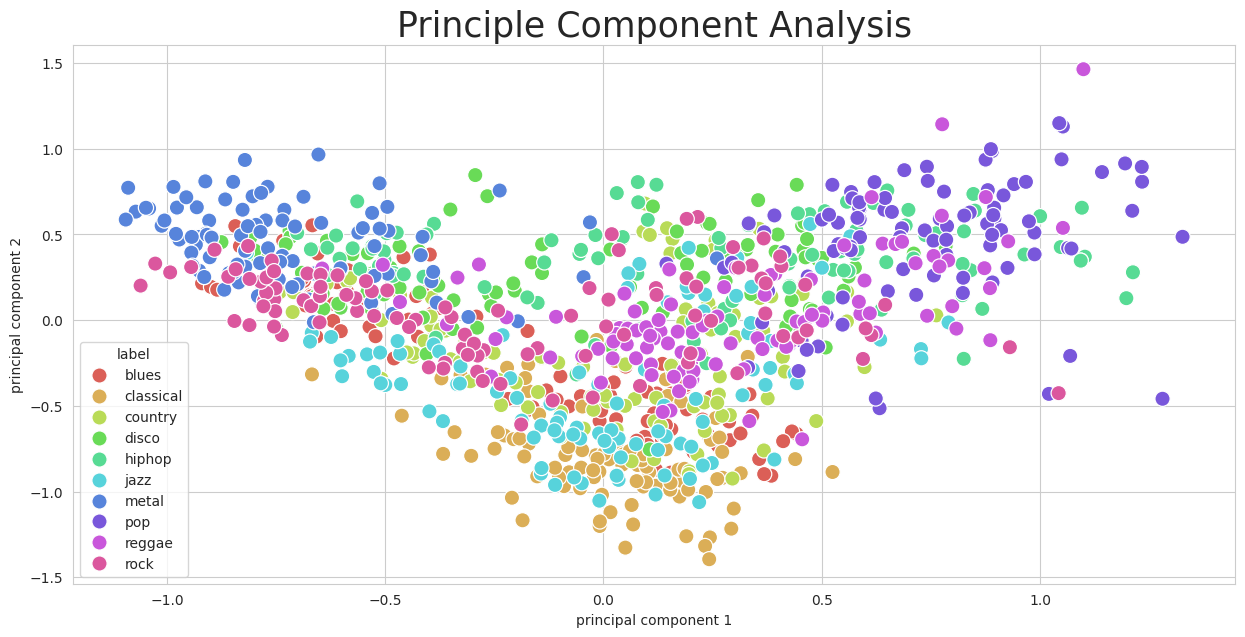

In [15]:
plt.figure(figsize=(15,7))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=finalDf,
    legend="full",
    s=120
)
plt.title('Principle Component Analysis', fontsize = 25)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [16]:
#Create Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [17]:
#Read data
data = pd.read_csv('features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [19]:
#Dependent and independent variables
y = data['label'] #dependent variable
X = data.loc[:, data.columns != 'label']#independent variable

# Drop non-numerical columns before scaling
X = X.select_dtypes(include=np.number)  # Keep only numerical features

#Normalize X
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [20]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [22]:
#Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predict_test = lr_model.predict(X_test)

#Accuracy
print("Logistic Regression's Accuracy is: ", accuracy_score(lr_predict_test, y_test))

Logistic Regression's Accuracy is:  0.7012012012012012


In [23]:
#KNN Model
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train, y_train)
knn_predict_test = knn_model.predict(X_test)

#Accuracy
print("KNN's Accuracy is: ", accuracy_score(knn_predict_test, y_test))

KNN's Accuracy is:  0.8313313313313313


In [25]:
#Support Vector Machine Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predict_test = svm_model.predict(X_test)

#Accuracy
print("SVM's Accuracy is: ", accuracy_score(svm_predict_test, y_test))

SVM's Accuracy is:  0.7587587587587588


In [26]:
#Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model_predict_test = dt_model.predict(X_test)

#Accuracy
print("Decision Tree's Accuracy is: ", accuracy_score(dt_model_predict_test, y_test))

Decision Tree's Accuracy is:  0.6531531531531531


In [27]:
#Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model_predict_test = rf_model.predict(X_test)

#Accuracy
print("Random Forest Model Accuracy is: ", accuracy_score(rf_model_predict_test, y_test))

Random Forest Model Accuracy is:  0.8773773773773774


In [29]:
#XGBoost Model
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) # Use the same encoder to transform y_test

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model_predict_test = xgb_model.predict(X_test)

#Accuracy
print("XGBoost Model Accuracy is: ", accuracy_score(xgb_model_predict_test, y_test))

XGBoost Model Accuracy is:  0.908908908908909
